In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ver

Idioma-Calificacion

Genero-Idioma

Genero-Anno

In [12]:
df=pd.read_csv('data/NetflixOriginals.csv', encoding="latin-1")     ### cambio el 'encoding' ya que el dataset contiene caracteres no incluidos en 'utf-8'
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


##### Al parecer no hay valores no nulos

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [13]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


##### Vamos a ver que idiomas existen en el DataSet para intentar buscar una relacion entre el idioma y la calificacion en IBM

In [15]:
df.Language.unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

##### Creamos un diccionario con los idiomas y su valor numerico

In [57]:
idiomas={}
j=0
for i in  df.Language.unique():
    idiomas[i]=j
    j+=1
    
idiomas

{0: 0,
 10: 1,
 20: 2,
 30: 3,
 40: 4,
 50: 5,
 60: 6,
 70: 7,
 80: 8,
 90: 9,
 100: 10,
 110: 11,
 120: 12,
 130: 13,
 140: 14,
 150: 15,
 160: 16,
 170: 17,
 180: 18,
 190: 19,
 200: 20,
 210: 21,
 220: 22,
 230: 23,
 240: 24,
 250: 25,
 260: 26,
 270: 27,
 280: 28,
 290: 29,
 300: 30,
 310: 31,
 320: 32,
 330: 33,
 340: 34,
 350: 35,
 360: 36,
 370: 37}

##### Cambiamos los idiomas por su valor numerico correspondiente

In [58]:
df.Language= df.Language.map(lambda x: idiomas[x])
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,0
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,1
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,2
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,3
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,4
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,3
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,37
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,3
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,12


### Intentamos buscar una primera correlacion

##### No existe tal correlacion, es mas bien neutra

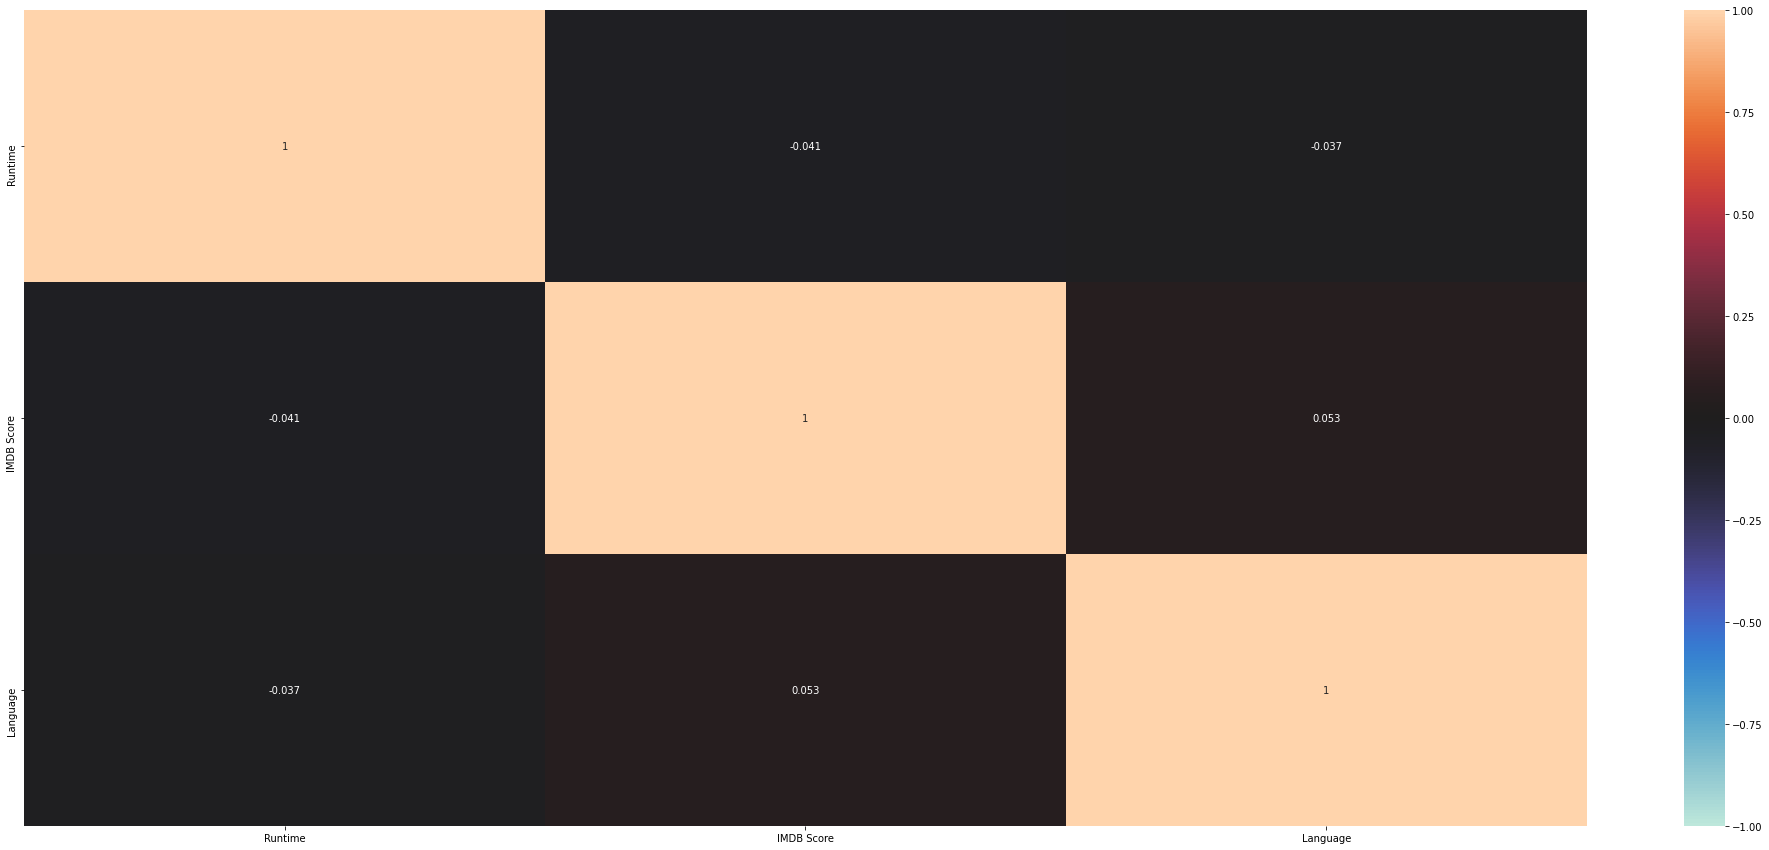

In [61]:
plt.subplots(figsize=(35,15))
sns.heatmap(df.corr(),center=0,annot=True, vmin=-1,vmax=1);

### Hacemos lo mismo con los Generos

##### Tampoco parece existir ninguna correlacion evidente aunque los valores sean un poco mas altos


In [64]:
generos={}
j=0
for i in  df.Genre.unique():
    generos[i]=j
    j+=1
    

df.Genre= df.Genre.map(lambda x: generos[x])

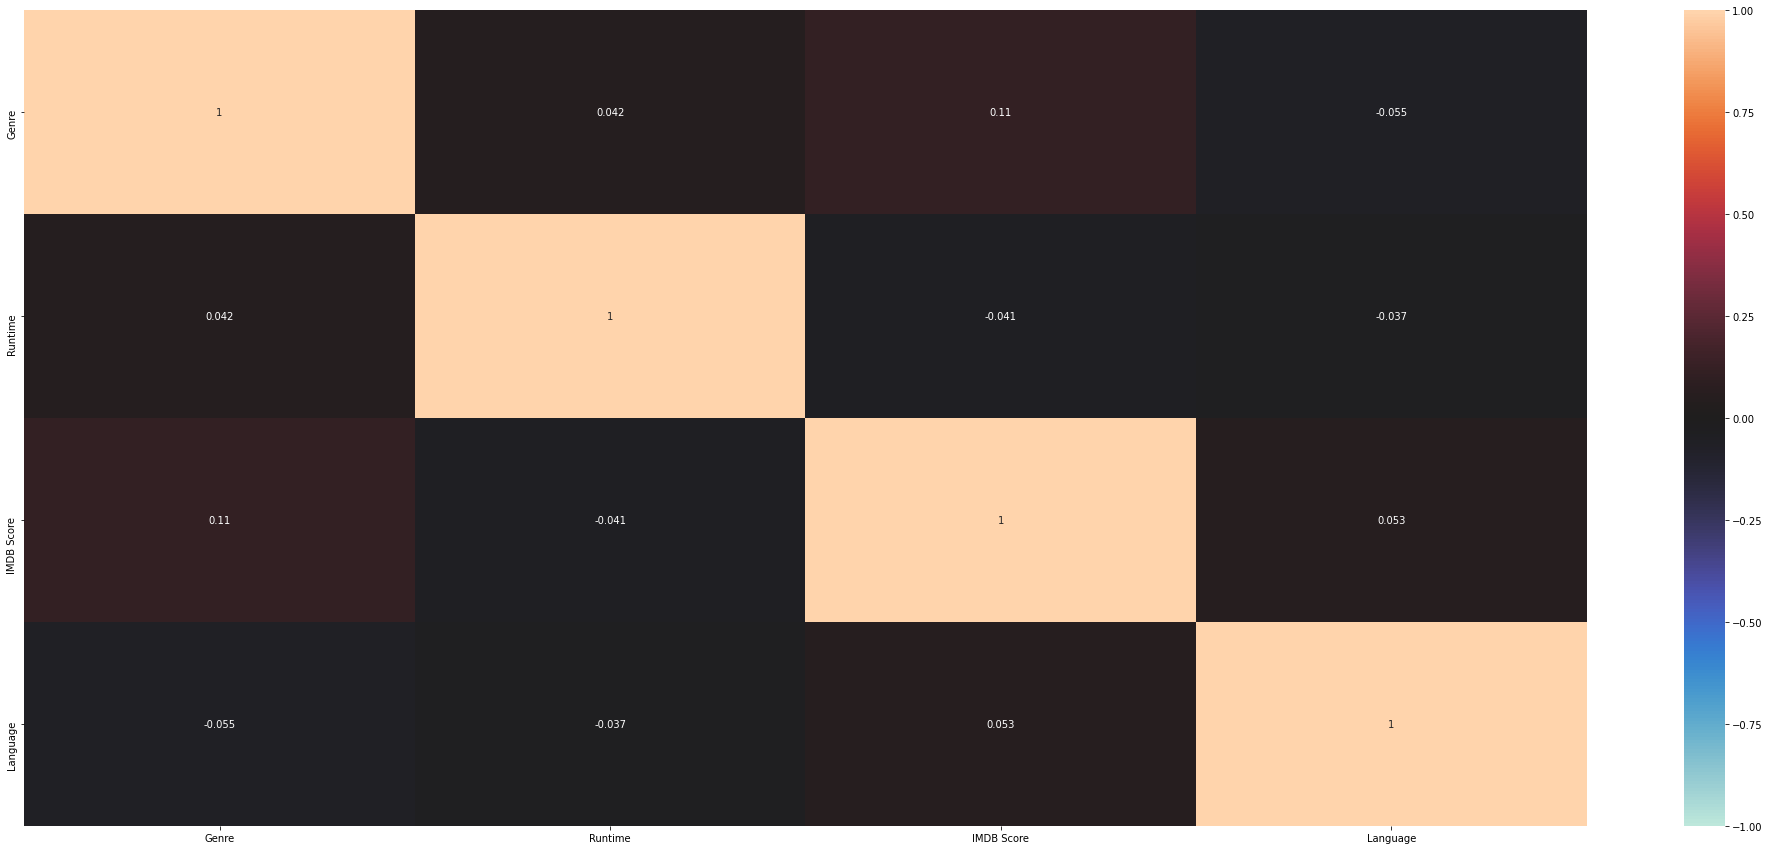

In [65]:
plt.subplots(figsize=(35,15))
sns.heatmap(df.corr(),center=0,annot=True, vmin=-1,vmax=1);

In [67]:
!pip install plotly
import plotly.figure_factory as ff

fig = ff.create_scatterplotmatrix(df,
                                 diag = 'box',
                                 index ='index',
                                 colormap = 'Portland',
                                 height = 700,
                                 width = 700)

iplot(fig)